In [1]:
# Para a correta execução do notebook será necessário instalar a biblioteca PyCaret
# pip install pycaret
# pip install openpyxl (Caso ocorra problema na leitura da base de dados)
# Tutorial: https://www.youtube.com/watch?v=88jD1nnkNfM&ab_channel=Let%27sData
# Site: https://www.learndatasci.com/tutorials/introduction-pycaret-machine-learning/
# !pip install pandas

#!pip install --upgrade pip
#!pip install openpyxl
#!pip install pycaret
#!pip install import-ipynb
!pip install shap

Defaulting to user installation because normal site-packages is not writeable


In [4]:
from pycaret.classification import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import import_ipynb
#import modelofuncoes as mf

In [5]:
#covidData = pd.read_excel("../database/novosDados/balanceados/balanceados_70_30_Jan2021.xlsx")
#urlBase = "SP/sp-l5-7030-2022.xlsx"

urlBase = "Inicial/ce-22-7030-2022.xlsx"
alvo = 'evolucaoCaso'

covidData = pd.read_excel(urlBase)
covidData.shape

#covidData = mf.juntarLotes('7030', True)
#covidData[alvo].value_counts()

(1326, 22)

In [4]:
colunasRemovidas = [ 'disturbiosOlfativos', 'disturbiosGustatorios', 'puerpera', 'fragilidadeImuno', 
                    'gestante', 'obesidade']

covidData = covidData.drop(columns = colunasRemovidas)
covidData.shape

(1326, 16)

In [ ]:
# covidData.dtypes

In [ ]:
setup_classificao = setup(data = covidData, target = alvo, train_size=0.7)

In [ ]:
# get_config('X')

In [ ]:
melhores_modelos = compare_models(n_select= 20)

In [ ]:
melhores_modelos[1]

In [ ]:
modelo_tunado = tune_model(melhores_modelos[1])

In [ ]:
#modelo_tunado[1]
#modelo_final = finalize_model(random_forest_tunado)

# Usando o Feature Selection

In [ ]:
#setupFeature = setup(data = covidData, target = 'EVOLUCAO', feature_selection = True)

In [ ]:
#setupFeature
#plot_model(melhores_modelos[0], plot='feature')

In [ ]:
#lr = create_model('lr')
#plotting a model
#plot_model(melhores_modelos[0])

## Treinando o melhor modelo


In [6]:
modeloDados = covidData
modeloDados.shape
#modeloDados = pd.read_excel(urlBase)

(1326, 22)

### Separando os dados (Treinamento e Teste)

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(modeloDados.drop(alvo,axis=1),
                                                    modeloDados[alvo],
                                                    test_size=0.3,
                                                    random_state=42);

### Escolhendo o Algoritmo

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
modeloClassificador = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=2333, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [11]:
modeloClassificador

GradientBoostingClassifier(random_state=2333)

In [ ]:
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

modeloClassificador = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=410)



In [7]:
from sklearn.linear_model import LogisticRegression

modeloClassificador = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2576, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
modeloClassificador = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7374, verbose=0,
                       warm_start=False)

# modeloClassificador.fit(x_train, y_train)


### Desempenho - Acurácia Geral

In [21]:
from sklearn.metrics import accuracy_score

# Fit nos dados
modeloClassificador.fit(x_train, y_train)

#Realizando a predição
resultado = modeloClassificador.predict(x_test)

# Verificando a acurácia
print(accuracy_score(y_test, resultado))

0.9020100502512562


### Desempenho - Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

kfolds = 3
data, target = modeloDados.drop(columns = [alvo]), modeloDados[alvo]
scores = cross_val_score(modeloClassificador, data, target, cv = kfolds, scoring = "accuracy") 

In [ ]:
print("Resultado dos k testes", scores)
print("Média dos testes", scores.mean())
print("Desvio Padrão dos testes", scores.std())

### Desempenho - Por Classes

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,resultado))

### Importância das Features

In [12]:
# Verificando os melhores dados
# from sklearn.ensemble import RandomForestClassifier

feature_importances = pd.DataFrame(modeloClassificador.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

<AxesSubplot:title={'center':'Feature Importance'}>

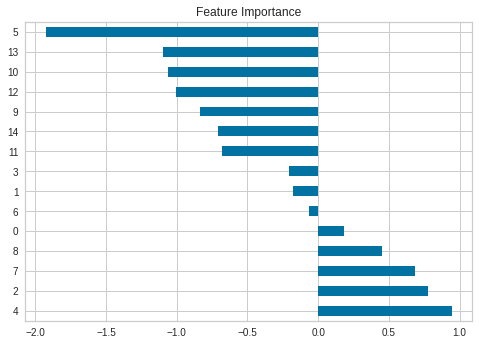

In [11]:
importance = modeloClassificador.coef_[0]
#importance is a list so you can plot it. 
feat_importances = pd.Series(importance)
feat_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

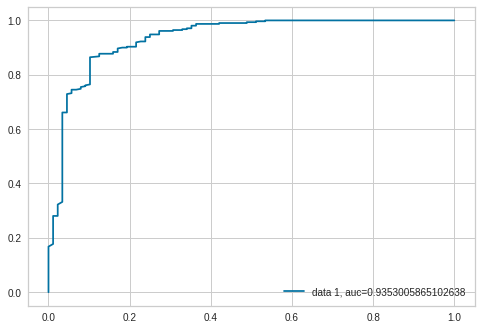

In [14]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Fit nos dados
modeloClassificador.fit(x_train, y_train)

#Realizando a predição
resultado = modeloClassificador.predict(x_test)

y_pred_proba = modeloClassificador.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()